In [1]:
# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("train_split.csv")
df1 = data.copy()
data.shape

(63999, 45)

In [3]:
data.head()

member_id  loan_amnt  funded_amnt  funded_amnt_inv       term  \
0   58189336      14350        14350          14350.0  36 months   
1   70011223       4800         4800           4800.0  36 months   
2   70255675      10000        10000          10000.0  36 months   
3    1893936      15000        15000          15000.0  36 months   
4    7652106      16000        16000          16000.0  36 months   

  batch_enrolled  int_rate grade sub_grade                          emp_title  \
0                    19.19     E        E3                              clerk   
1     BAT1586599     10.99     B        B4         Human Resources Specialist   
2     BAT1586599      7.26     A        A4                             Driver   
3     BAT4808022     19.72     D        D5  Us office of Personnel Management   
4     BAT2833642     10.64     B        B2        LAUSD-HOLLYWOOD HIGH SCHOOL   

   ... collections_12_mths_ex_med mths_since_last_major_derog  \
0  ...                        0.0                        74.0   
1  ...                        0.0                         NaN   
2  ...                        0.0                         NaN   
3  ...                        0.0                         NaN   
4  ...                        0.0                         NaN   

   application_type verification_status_joint last_week_pay acc_now_delinq  \
0        INDIVIDUAL                       NaN     26th week              0   
1        INDIVIDUAL                       NaN      9th week              0   
2        INDIVIDUAL                       NaN      9th week              0   
3        INDIVIDUAL                       NaN    135th week              0   
4        INDIVIDUAL                       NaN     96th week              0   

  tot_coll_amt tot_cur_bal total_rev_hi_lim loan_status  
0          0.0     28699.0          30800.0           0  
1          0.0      9974.0          32900.0           0  
2         65.0     38295.0          34900.0           0  
3          0.0     55564.0          24700.0           0  
4          0.0     47159.0          47033.0           0  

[5 rows x 45 columns]

# Data Cleaning and pre-processing 

In [4]:
[(sum(data[i].isnull()),i) for i in data.columns]

[(0, 'member_id'),
 (0, 'loan_amnt'),
 (0, 'funded_amnt'),
 (0, 'funded_amnt_inv'),
 (0, 'term'),
 (10264, 'batch_enrolled'),
 (0, 'int_rate'),
 (0, 'grade'),
 (0, 'sub_grade'),
 (3826, 'emp_title'),
 (3324, 'emp_length'),
 (0, 'home_ownership'),
 (0, 'annual_inc'),
 (0, 'verification_status'),
 (0, 'pymnt_plan'),
 (54849, 'desc'),
 (0, 'purpose'),
 (13, 'title'),
 (0, 'zip_code'),
 (0, 'addr_state'),
 (0, 'dti'),
 (0, 'delinq_2yrs'),
 (0, 'inq_last_6mths'),
 (32831, 'mths_since_last_delinq'),
 (54349, 'mths_since_last_record'),
 (0, 'open_acc'),
 (0, 'pub_rec'),
 (0, 'revol_bal'),
 (29, 'revol_util'),
 (0, 'total_acc'),
 (0, 'initial_list_status'),
 (0, 'total_rec_int'),
 (0, 'total_rec_late_fee'),
 (0, 'recoveries'),
 (0, 'collection_recovery_fee'),
 (8, 'collections_12_mths_ex_med'),
 (48155, 'mths_since_last_major_derog'),
 (0, 'application_type'),
 (63971, 'verification_status_joint'),
 (0, 'last_week_pay'),
 (0, 'acc_now_delinq'),
 (5124, 'tot_coll_amt'),
 (5124, 'tot_cur_bal'),


In [5]:
## dropping the columns with too many nulls from the above statement 
# we don't use these columns to determine the loan eligibility so dropping uncessary to improve accuracy of decision
data=data.drop(['desc','mths_since_last_delinq','mths_since_last_record','mths_since_last_major_derog','verification_status_joint'], axis=1)

In [6]:
###Categorizing the coulums into numeric and categorical for data cleaning 
typesOfNumerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric = data.select_dtypes(include=typesOfNumerics)

categorical = data.drop(numeric, axis=1)
# numeric.columns 
# categorical.columns 

### Data cleaning for categorical values

In [7]:
###Data frame for categorical values 
categorical.head()

term batch_enrolled grade sub_grade  \
0  36 months                    E        E3   
1  36 months     BAT1586599     B        B4   
2  36 months     BAT1586599     A        A4   
3  36 months     BAT4808022     D        D5   
4  36 months     BAT2833642     B        B2   

                           emp_title emp_length home_ownership  \
0                              clerk    9 years            OWN   
1         Human Resources Specialist   < 1 year       MORTGAGE   
2                             Driver    2 years            OWN   
3  Us office of Personnel Management  10+ years           RENT   
4        LAUSD-HOLLYWOOD HIGH SCHOOL  10+ years           RENT   

  verification_status pymnt_plan             purpose               title  \
0     Source Verified          n  debt_consolidation  Debt consolidation   
1     Source Verified          n    home_improvement    Home improvement   
2        Not Verified          n  debt_consolidation  Debt consolidation   
3        Not Verified          n  debt_consolidation  Debt consolidation   
4            Verified          n         credit_card                refi   

  zip_code addr_state initial_list_status application_type last_week_pay  
0    349xx         FL                   f       INDIVIDUAL     26th week  
1    209xx         MD                   w       INDIVIDUAL      9th week  
2    447xx         OH                   w       INDIVIDUAL      9th week  
3    221xx         VA                   f       INDIVIDUAL    135th week  
4    900xx         CA                   w       INDIVIDUAL     96th week

In [8]:
### Editing the feature 'term' by extracting the number from the string 
data['term'] = data['term'].str.split(' ').str[0]

In [9]:
### Removing unrelated features
# batch_enrolled has too many missing values and empty data
# zip_code is not complete we have only 3 digits
# addr_state has too mant categories to analyse
# pymnt_plan has only sigle value 'n'
data=data.drop(['batch_enrolled','zip_code','addr_state','pymnt_plan','member_id'], axis=1)

In [10]:
### Replacing the null values in emp_title to 'unspecified'
data['emp_title'].fillna(value="unspecified",inplace=True)

In [11]:
### Removing either 'purpose' or 'title' because they've the same data 
data=data.drop(['title'], axis=1)

In [12]:
## extract the number from 'emp_length'
data['emp_length']=data['emp_length'].str.extract('(\d+)')
data['emp_length'].fillna(value='-1',inplace=True)
data['emp_length'] = data['emp_length'].astype(int)

In [13]:
## extract the number form 'last_week_pay'
data['last_week_pay']=data['last_week_pay'].str.extract('(\d+)')
data['last_week_pay'].fillna(value='-1',inplace=True)
data['last_week_pay'] = data['last_week_pay'].astype(int)

### Data cleaning for numerical values

In [14]:
### Data cleaning for numerical values 
numeric.head()

member_id  loan_amnt  funded_amnt  funded_amnt_inv  int_rate  annual_inc  \
0   58189336      14350        14350          14350.0     19.19     28700.0   
1   70011223       4800         4800           4800.0     10.99     65000.0   
2   70255675      10000        10000          10000.0      7.26     45000.0   
3    1893936      15000        15000          15000.0     19.72    105000.0   
4    7652106      16000        16000          16000.0     10.64     52000.0   

     dti  delinq_2yrs  inq_last_6mths  open_acc  ...  total_rec_int  \
0  33.88            0               1        14  ...        1173.84   
1   3.64            0               1         6  ...          83.95   
2  18.42            0               0         5  ...          56.47   
3  14.97            0               2        10  ...        4858.62   
4  20.16            0               0        11  ...        2296.41   

   total_rec_late_fee  recoveries  collection_recovery_fee  \
0                 0.0         0.0                      0.0   
1                 0.0         0.0                      0.0   
2                 0.0         0.0                      0.0   
3                 0.0         0.0                      0.0   
4                 0.0         0.0                      0.0   

   collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
0                         0.0               0           0.0      28699.0   
1                         0.0               0           0.0       9974.0   
2                         0.0               0          65.0      38295.0   
3                         0.0               0           0.0      55564.0   
4                         0.0               0           0.0      47159.0   

   total_rev_hi_lim  loan_status  
0           30800.0            0  
1           32900.0            0  
2           34900.0            0  
3           24700.0            0  
4           47033.0            0  

[5 rows x 24 columns]

<AxesSubplot:ylabel='Frequency'>

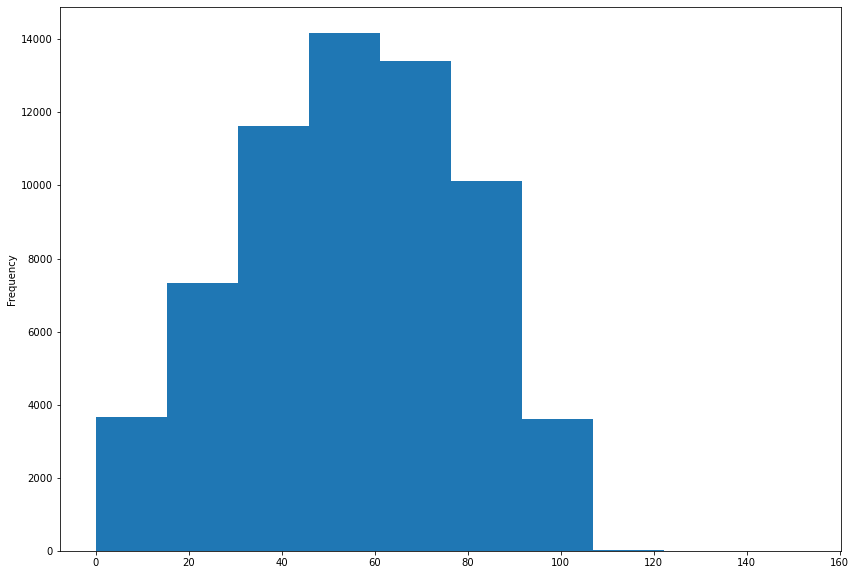

In [15]:
plt.figure(figsize = (14,10)) 
data['revol_util'].plot.hist()

##### Imputation

In [16]:
### Imputing the null values in 'revol_util' with median value
data['revol_util'].fillna(value=data['revol_util'].median(),inplace=True)

In [17]:
### dropped the column tot_coll_amt because of the high frequency of zero's 
data['tot_coll_amt'].value_counts()
data.drop('tot_coll_amt',axis=1,inplace=True)

In [18]:
## dropping column as its just 0
data.drop('collections_12_mths_ex_med',axis=1,inplace=True)

In [19]:
### dropped the column 'total_rev_hi_lim' because of the high frequency of zero's 
data['total_rev_hi_lim'].value_counts()
data.drop('total_rev_hi_lim',axis=1,inplace=True)

In [20]:
### Imputing the null values in 'tot_cur_bal' with median value
data['tot_cur_bal'].value_counts()
data['tot_cur_bal'].fillna(value=data['tot_cur_bal'].median(),inplace=True)

In [21]:
# To find the relation between these 3 columns, we are performing corelation. 
temp = pd.DataFrame(data,columns=['loan_amnt','funded_amnt','funded_amnt_inv'])
corrMatrix = temp.corr()
print (corrMatrix)

                 loan_amnt  funded_amnt  funded_amnt_inv
loan_amnt         1.000000     0.999367         0.997395
funded_amnt       0.999367     1.000000         0.998170
funded_amnt_inv   0.997395     0.998170         1.000000


In [22]:
#The results stated high corelation which is why we are deleting two of these columns  
data.drop('funded_amnt',axis=1,inplace=True)
data.drop('funded_amnt_inv',axis=1,inplace=True)

In [23]:
# Application data only has mostly one type in it
data['application_type'].value_counts()
data.drop('application_type',axis=1,inplace=True)

In [24]:
#Most of the value counts of these columns are zero, so we dropped them

temp = ['total_rec_late_fee','recoveries','collection_recovery_fee','acc_now_delinq','delinq_2yrs','pub_rec']

for i in temp:
    print(data[i].value_counts())

data.drop(temp,axis=1,inplace=True)

0.000000     63155
15.000000      195
30.000000       23
27.030000        3
17.480000        3
             ...  
14.996395        1
75.880000        1
63.490000        1
59.260000        1
31.000000        1
Name: total_rec_late_fee, Length: 600, dtype: int64
0.00       62231
12.80          2
11.60          2
1670.58        2
13.11          2
           ...  
935.26         1
3580.70        1
2079.57        1
618.75         1
2048.61        1
Name: recoveries, Length: 1754, dtype: int64
0.0000     62319
2.0100         3
3.2000         3
0.4000         2
4.1700         2
           ...  
0.8500         1
2.2900         1
2.7600         1
25.5957        1
22.0635        1
Name: collection_recovery_fee, Length: 1653, dtype: int64
0    63679
1      299
2       17
3        3
4        1
Name: acc_now_delinq, dtype: int64
0     51612
1      8262
2      2404
3       874
4       384
5       194
6       108
7        52
8        38
9        26
10       17
11        8
12        7
13        5
14  

In [25]:
[(sum(data[i].isnull()),i) for i in data.columns]

[(0, 'loan_amnt'),
 (0, 'term'),
 (0, 'int_rate'),
 (0, 'grade'),
 (0, 'sub_grade'),
 (0, 'emp_title'),
 (0, 'emp_length'),
 (0, 'home_ownership'),
 (0, 'annual_inc'),
 (0, 'verification_status'),
 (0, 'purpose'),
 (0, 'dti'),
 (0, 'inq_last_6mths'),
 (0, 'open_acc'),
 (0, 'revol_bal'),
 (0, 'revol_util'),
 (0, 'total_acc'),
 (0, 'initial_list_status'),
 (0, 'total_rec_int'),
 (0, 'last_week_pay'),
 (0, 'tot_cur_bal'),
 (0, 'loan_status')]

# EDA

In [26]:
import plotly.express as plot
df=data.copy()

### getting ratio of target variable to check balance between values
categories = ['Loan Granted','Loan Not Granted']
fig = plot.pie(names=categories,values = df.loan_status.value_counts().values,title='Percentage Loan Granted of Total Application')
fig.show()

From the figure we can infer we understand that only 23% people not granted the loan

There are 1073978 words in the combination of all cells in column Employee Title.


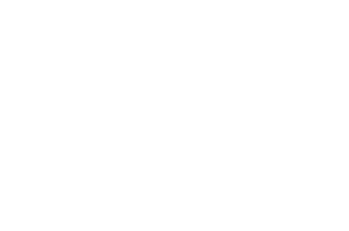

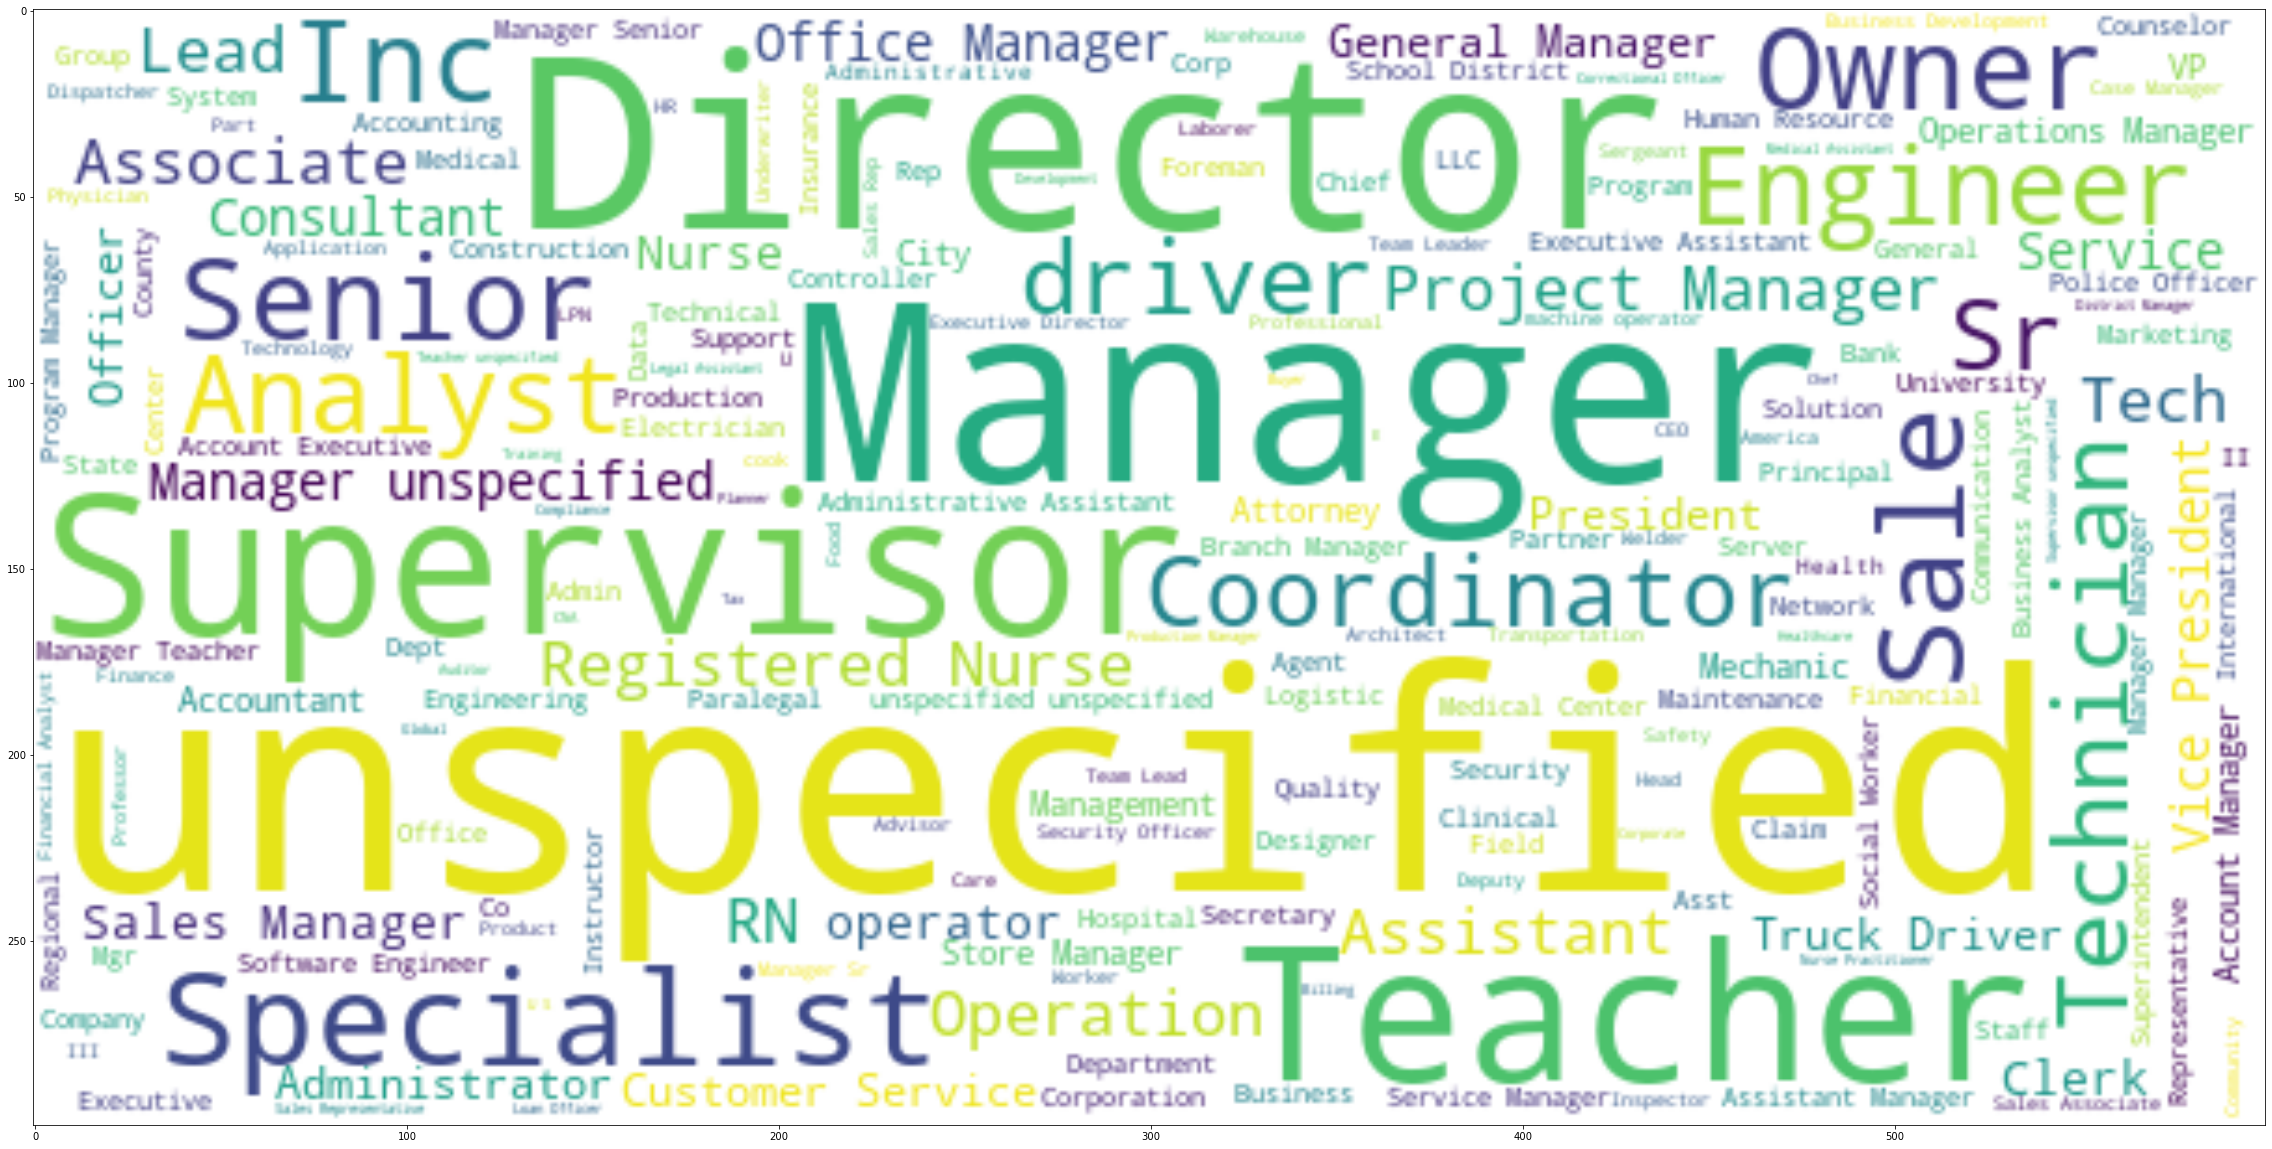

In [53]:
from wordcloud import WordCloud

# Text of all words in column bloom

text = " ".join(review for review in df.emp_title.astype(str))
print ("There are {} words in the combination of all cells in column Employee Title.".format(len(text)))

# Generate a word cloud image

wordcloud = WordCloud(background_color="white", width=600, height=300).generate(text)

# Display the generated image:
# the matplotlib way:

plt.axis("off")
plt.figure( figsize=(40,30))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()


Understood from the graph that the most repeated professions were Director, teacher, supervisor, unspecified etc. 

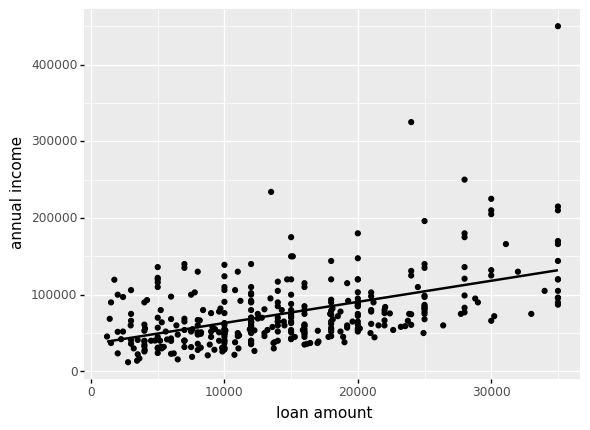

<ggplot: (185811487754)>

In [28]:
from plotnine import *
from plotnine.data import *

%matplotlib inline

(ggplot(df1.sample(350))  # What data to use
    + aes(x="loan_amnt", y="annual_inc")
    + geom_point() + geom_smooth(method='lm', se=False) 
    + xlab("loan amount")
    + ylab("annual income"))

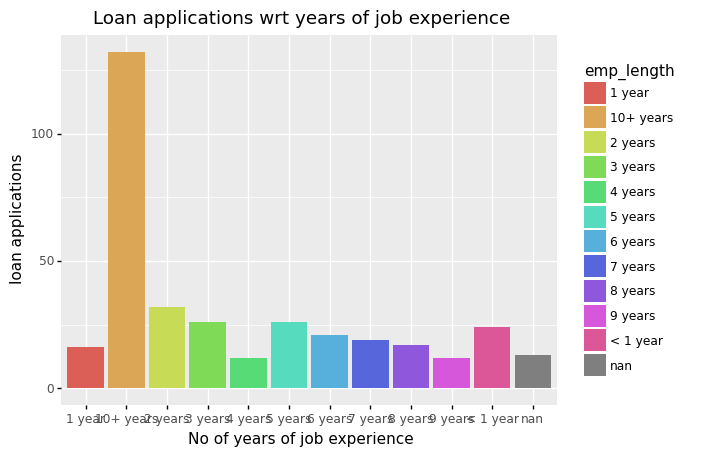

<ggplot: (185811531063)>

In [29]:
(
ggplot(df1.sample(350))
    + aes(x = "emp_length", fill = "emp_length") 
    + geom_bar(position = position_dodge(preserve = "single")) 
    + labs(y="loan applications", x="No of years of job experience") 
    + ggtitle("Loan applications wrt years of job experience")
)

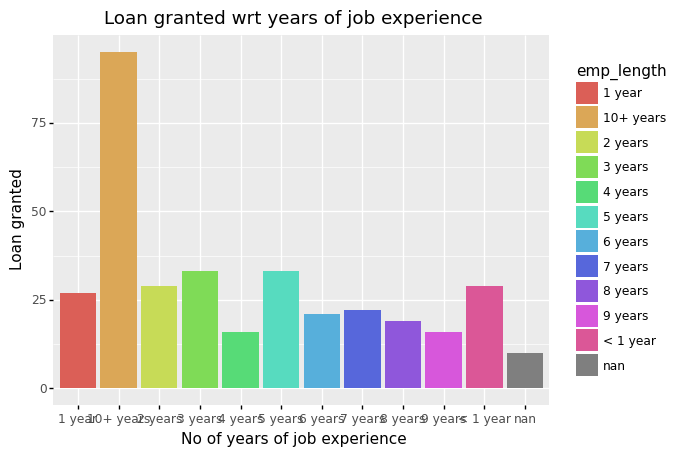

<ggplot: (185811701492)>

In [30]:
loan_granted = [status == 1 for status in df1["loan_status"]]

## apply the mast to the columns
loanGranted_DF =df1[loan_granted]
(ggplot(loanGranted_DF.sample(350))+ aes(x = "emp_length", fill = "emp_length")
+ geom_bar(position = position_dodge(preserve = "single")) 
+ labs(y="Loan granted", x="No of years of job experience") 
+ ggtitle("Loan granted wrt years of job experience"))

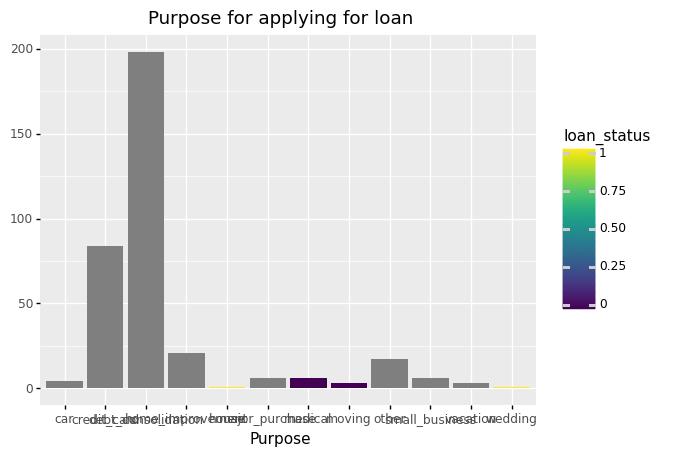

<ggplot: (185811564746)>

In [31]:
(ggplot(df1.sample(350))
 + aes(x = "purpose", fill = "loan_status") 
 + geom_bar(position = position_dodge(preserve = "single")) 
 + labs(y="", x="Purpose") 
 + ggtitle("Purpose for applying for loan")
)

In [32]:
## Percentage of loan approval according to an Applicant's profession
temp = data.copy()
temp['emp'] = data.emp_title
temp['loan_status'] = data.loan_status

list = temp.emp.value_counts().head(25).index

categories = ['Loan Granted','Loan Not Granted']
for i in list:
    title = temp[temp.emp == i].loan_status.value_counts()
    fig = plot.pie(names=categories,values = title)
    fig.update_layout(title_text="Percentage Loan Pass Success according to Employment -- "+ i)
    fig.show()
    

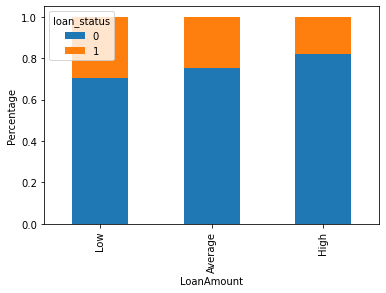

In [33]:
#Graph of loan Amount against loan status when the amount is binned into 3 categories i.e. low, average and high
bins = [500,5000,20000,35000]
group = ['Low','Average','High']
df['LoanAmount_bin'] = pd.cut(df['loan_amnt'],bins,labels=group)
LoanAmount_bin = pd.crosstab(df['LoanAmount_bin'],df['loan_status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

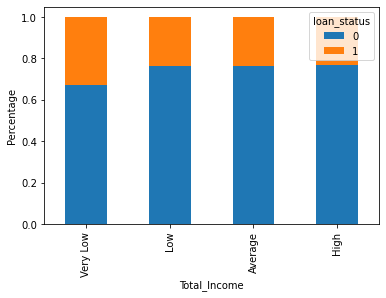

In [34]:
#Graph of Income against loan status when the total income is binned into 4 categories i.e. very low, low, average and high
bins = [4500,10000,30000,100000,4000000]
group = ['Very Low','Low','Average', 'High']
df['Total_Income_bin'] = pd.cut(df['annual_inc'],bins,labels=group)
Total_Income_bin = pd.crosstab(df['Total_Income_bin'],df['loan_status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

Text(0.5, 1.0, 'Term period wrt loan amount')

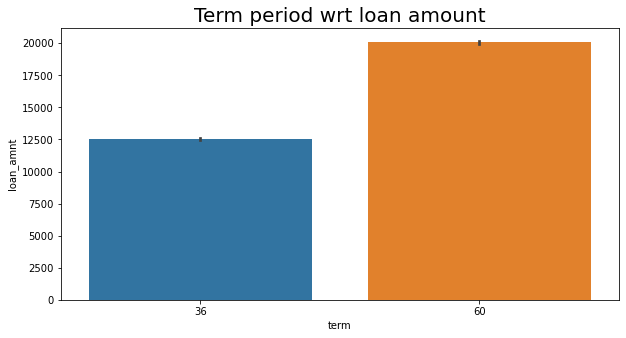

In [35]:
#Graph of loan Amount against time period 
plt.figure(figsize=(10,5))
sns.barplot(df.term,df.loan_amnt)
plt.title('Term period wrt loan amount',size=20)

# Data Preprocessing

In [36]:
from sklearn.preprocessing import LabelEncoder

num = data.select_dtypes(include=typesOfNumerics).columns
cat = data.drop(num,axis=1)
cat = cat.columns

data[cat] = data[cat].apply(LabelEncoder().fit_transform)



<AxesSubplot:>

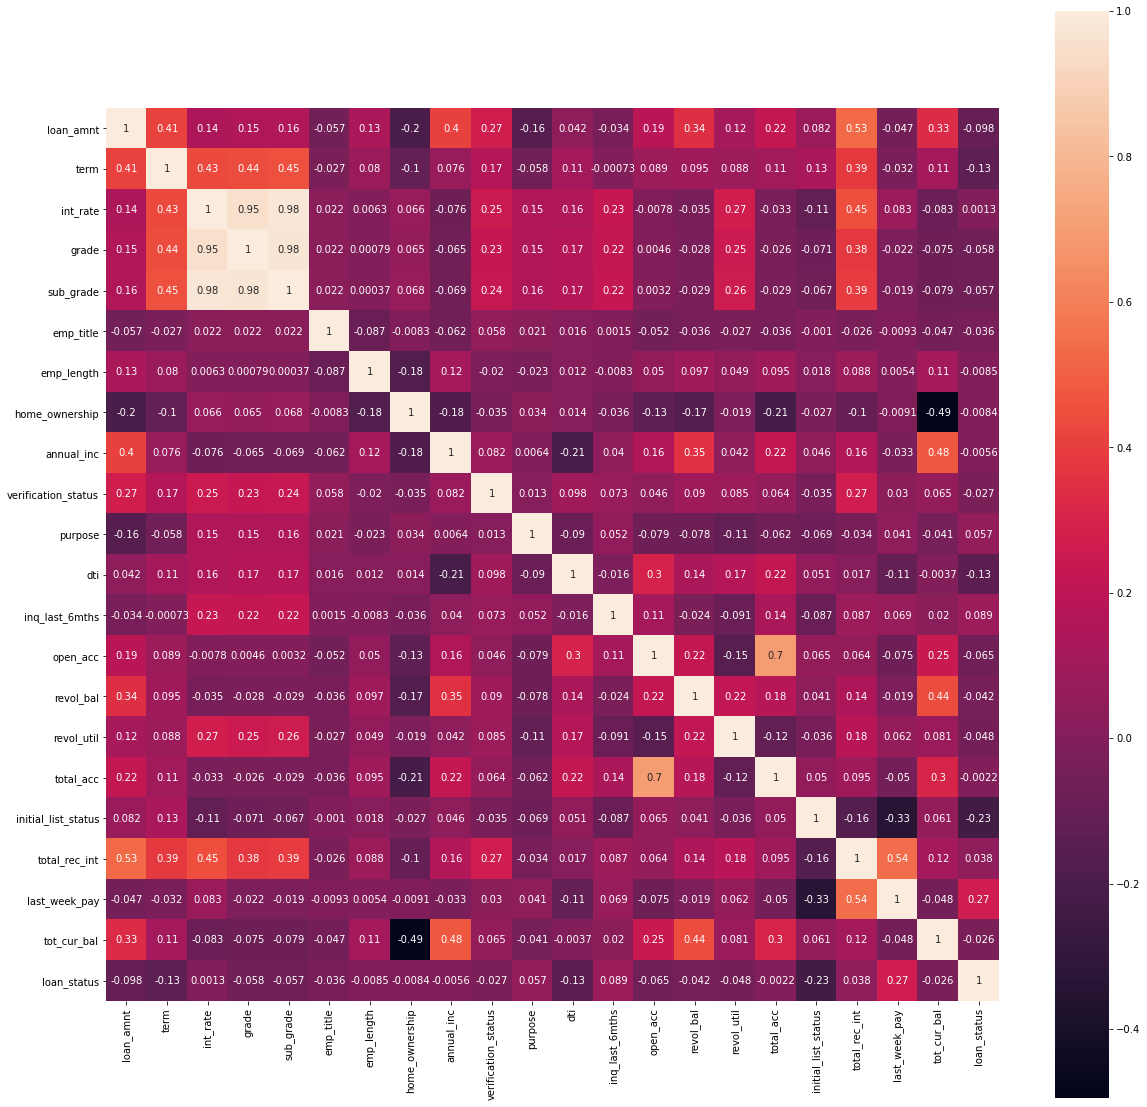

In [37]:
#Heat map for finding correlation 
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,square=True)

In [38]:
# Elimate features with high correlation
highco = ['grade','sub_grade','total_acc']
data.drop(highco,axis=1,inplace=True)

# Machine learning Algorithms

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score

In [40]:
X = data.drop('loan_status',axis=1)
y = data['loan_status']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=101)

# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,max_depth=8, random_state=42,class_weight='balanced')
model.fit(X_train,y_train)


RandomForestClassifier(class_weight='balanced', max_depth=8, random_state=42)

In [42]:
# make prediction
predictions = model.predict(X_test)

AUC-ROC Score : 0.6852649701152006
Report:
               precision    recall  f1-score   support

           0       0.86      0.76      0.81     12152
           1       0.44      0.61      0.52      3848

    accuracy                           0.72     16000
   macro avg       0.65      0.69      0.66     16000
weighted avg       0.76      0.72      0.74     16000

confusion Matrix:
 [[9186 1483]
 [2966 2365]]
cross validation: 0.7310739230300474


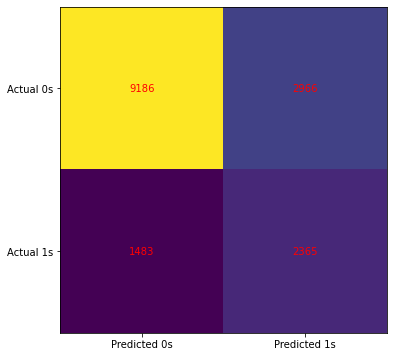

In [43]:
print('AUC-ROC Score :',roc_auc_score(y_test, predictions))
print('Report:\n',classification_report(y_test, predictions))
print('confusion Matrix:\n',confusion_matrix(predictions,y_test))
print('cross validation:',cross_val_score(model, X, y, cv=3).mean())

cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [44]:
#using recursive feature elimination

from sklearn.feature_selection import RFE

rfe = RFE(model, 8) 
rfe.fit(X_train,y_train)
cols = X_train.columns[rfe.support_]
cols

Index(['loan_amnt', 'term', 'int_rate', 'dti', 'initial_list_status',
       'total_rec_int', 'last_week_pay', 'tot_cur_bal'],
      dtype='object')

AUC-ROC Score : 0.6835393402213679
Report:
               precision    recall  f1-score   support

           0       0.86      0.73      0.79     12152
           1       0.43      0.63      0.51      3848

    accuracy                           0.71     16000
   macro avg       0.65      0.68      0.65     16000
weighted avg       0.76      0.71      0.73     16000

confusion Matrix:
 [[8923 1413]
 [3229 2435]]


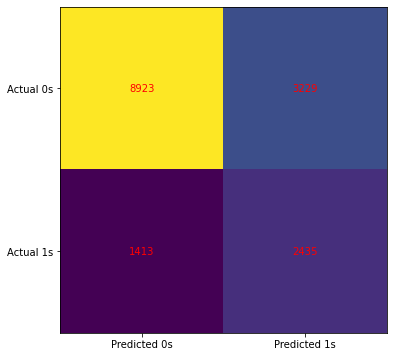

In [45]:
model = RandomForestClassifier(n_estimators=200,max_depth=8, random_state=101,class_weight='balanced')
model.fit(X_train[cols],y_train)
predictions = model.predict(X_test[cols])
print('AUC-ROC Score :',roc_auc_score(y_test, predictions))
print('Report:\n',classification_report(y_test, predictions))
print('confusion Matrix:\n',confusion_matrix(predictions,y_test))

cm = confusion_matrix(y_test, model.predict(X_test[cols]))

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# XGBoost

In [46]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimator=100,max_depth=12,class_weight='balanced',refit='AUC')
xgb.fit(X_train[cols],y_train)

[22:28:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { class_weight, n_estimator, refit } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:28:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=12, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimator=100, n_estimators=100,
              n_jobs=4, num_parallel_tree=1, random_state=0, refit='AUC',
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

AUC-ROC Score : 0.6835393402213679
Report:
               precision    recall  f1-score   support

           0       0.86      0.73      0.79     12152
           1       0.43      0.63      0.51      3848

    accuracy                           0.71     16000
   macro avg       0.65      0.68      0.65     16000
weighted avg       0.76      0.71      0.73     16000

confusion Matrix:
 [[8923 1413]
 [3229 2435]]


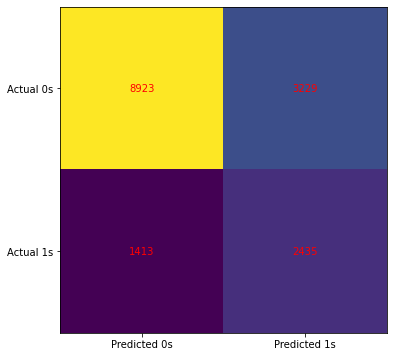

In [47]:
predictions = model.predict(X_test[cols])
print('AUC-ROC Score :',roc_auc_score(y_test, predictions))
print('Report:\n',classification_report(y_test, predictions))
print('confusion Matrix:\n',confusion_matrix(predictions,y_test))

cm = confusion_matrix(y_test, model.predict(X_test[cols]))

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# lightGBM

In [48]:
# import library
import lightgbm as lgb

model = lgb.LGBMClassifier(n_estimators=600,random_state=101,max_depth=8,class_weight='balanced')
model.fit(X_train[cols], y_train)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


LGBMClassifier(class_weight='balanced', max_depth=8, n_estimators=600,
               random_state=101)

AUC-ROC Score : 0.8131061474955483
Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     12152
           1       0.68      0.74      0.71      3848

    accuracy                           0.85     16000
   macro avg       0.80      0.81      0.80     16000
weighted avg       0.86      0.85      0.85     16000

confusion Matrix:
 [[10793  1008]
 [ 1359  2840]]


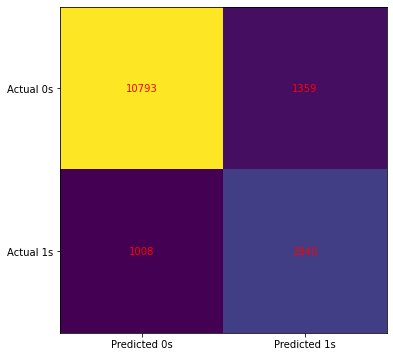

In [49]:
predictions = model.predict(X_test[cols])
print('AUC-ROC Score :',roc_auc_score(y_test, predictions))
print('Report:\n',classification_report(y_test, predictions))
print('confusion Matrix:\n',confusion_matrix(predictions,y_test))

cm = confusion_matrix(y_test, model.predict(X_test[cols]))

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Visualizing Results 

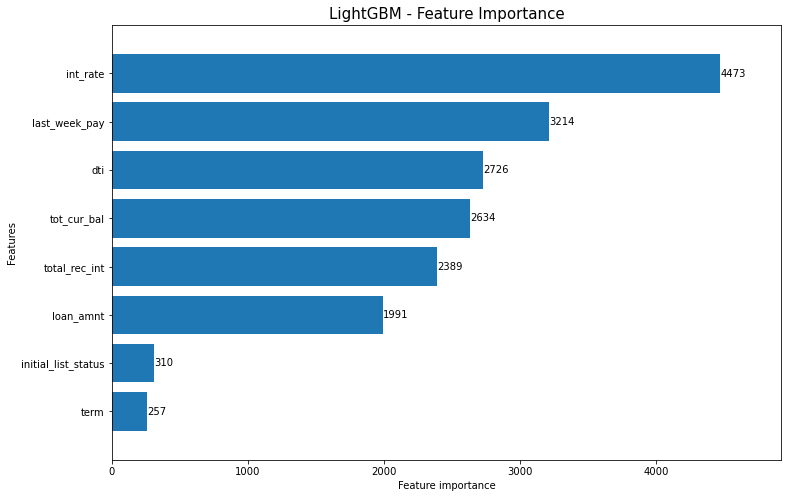

In [50]:
fig, ax = plt.subplots(figsize=(12,8))
lgb.plot_importance(model, max_num_features=10, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()


Text(0.5, 1.0, 'Confusion Matrix')

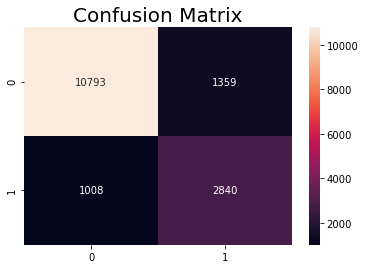

In [51]:
#Confusion matrix
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='d')
plt.title('Confusion Matrix',size=20)

In [52]:
#Predicted Vs Actual loan granted ratio
val = y_test.value_counts()
valpred= pd.Series(predictions).value_counts()

fig = plot.pie(names=categories,values =val,title='Actual Percentage Loan Granted of Total Application')
fig.show()

fig = plot.pie(names=categories,values =valpred,title='Actual Percentage Loan Granted of Total Application')
fig.show()